# Execute the code below

In [ ]:
import pandas as pd
import numpy as np
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)

## You have now a DataFrame with lots of weather data

In [ ]:
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.0,1037,62.250,9,6,3,116,143,176,0,1,5.1,very bad,1,1
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.0,1040,58.125,8,6,3,119,116,116,0,1,8.7,very bad,1,2
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.0,1040,37.000,6,1,-4,116,116,116,0,1,8.7,very bad,1,3
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.0,1040,42.625,5,1,-4,116,116,122,0,1,5.1,very bad,1,4
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.0,1040,17.250,6,2,-2,143,116,116,0,1,8.7,very bad,1,5


# Now, complete the following tasks:

## Merge
OK, you know very well the previous dataset. Now, you want to add something. Another year for example?

But the year 2018 is not in a good shape. There are 2 files:
- The main file with temperature and other data
- The opinion file with the opinion column

The goal is [to merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) both files in one DataFrame called **df2018**. It seems both files have a date column with the same format (but not the same name). 

Think about checking if both datasets have the same length. If they don't, think of the kind of merge do you have to do to keep each date of the main dataset. Then apply this specific merge. And finally drop the duplicate date column to clean your dataframe.

In [ ]:
link_main = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_2018.csv"
link_opinion = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_2018.csv"
df_main = pd.read_csv(link_main)
df_opinion = pd.read_csv(link_opinion)
print(df_main.head())
print(df_opinion.head())

         DATE  MAX_TEMPERATURE_C  ...  DEWPOINT_MAX_C  WINDTEMP_MAX_C
0  2018-01-01                 12  ...               8               7
1  2018-01-02                 13  ...              12               6
2  2018-01-03                 15  ...              13               7
3  2018-01-04                 14  ...              12              10
4  2018-01-05                 12  ...              10               7

[5 rows x 15 columns]
         date  WEATHER_CODE_EVENING  TOTAL_SNOW_MM  UV_INDEX  SUNHOUR OPINION
0  2018-01-01                   113              0         3      5.1     bad
1  2018-03-12                   119              0         2      8.8     bad
2  2018-03-09                   116              0         3     10.2     bad
3  2018-10-07                   122              0         1      5.6     bad
4  2018-06-18                   119              0         1     12.9     bad


In [ ]:
# Your code here:
import pandas as pd 
df2018 = pd.merge(df_main, df_opinion, left_on = 'DATE' , right_on= 'date', how='left').drop(columns='date')

df2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    365 non-null    object 
 1   MAX_TEMPERATURE_C       365 non-null    int64  
 2   MIN_TEMPERATURE_C       365 non-null    int64  
 3   WINDSPEED_MAX_KMH       365 non-null    int64  
 4   TEMPERATURE_MORNING_C   365 non-null    int64  
 5   TEMPERATURE_NOON_C      365 non-null    int64  
 6   TEMPERATURE_EVENING_C   365 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64  
 9   VISIBILITY_AVG_KM       365 non-null    float64
 10  PRESSURE_MAX_MB         365 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64
 12  HEATINDEX_MAX_C         365 non-null    int64  
 13  DEWPOINT_MAX_C          365 non-null    int64  
 14  WINDTEMP_MAX_C          365 non-null    in

### Result

Your DataFrame **df2018** should now have 20 columns and 365 rows. If not, try again.

**Ohhhh, there are some missing values, we have to fill them.**

In [ ]:
print("My DataFrame shape is : ", df2018.shape, end = '\n\n\n\n')
print('Which columns have missing values ?')
print(df2018.info())


My DataFrame shape is :  (365, 20)



Which columns have missing values ?
<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    365 non-null    object 
 1   MAX_TEMPERATURE_C       365 non-null    int64  
 2   MIN_TEMPERATURE_C       365 non-null    int64  
 3   WINDSPEED_MAX_KMH       365 non-null    int64  
 4   TEMPERATURE_MORNING_C   365 non-null    int64  
 5   TEMPERATURE_NOON_C      365 non-null    int64  
 6   TEMPERATURE_EVENING_C   365 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64  
 9   VISIBILITY_AVG_KM       365 non-null    float64
 10  PRESSURE_MAX_MB         365 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64
 12  HEATINDEX_MAX_C         365 non-null    int64  
 13  DEWPOINT_MAX_C       

### Find the Dates of missing values.
You can use the .isna() method

In [ ]:
# Date is not a date, but an OBJECT type
#df2018.loc[:,'DATE'] = pd.to_datetime(df2018['DATE'])

# Your code here:

print(df2018.columns[df2018.isna().any()].tolist())

print(df2018[df2018['WEATHER_CODE_EVENING'].isna()]['DATE'])
print(df2018[df2018['TOTAL_SNOW_MM'].isna()]['DATE'])
print(df2018[df2018['UV_INDEX'].isna()]['DATE'])
print(df2018[df2018['SUNHOUR'].isna()]['DATE'])
print(df2018[df2018['OPINION'].isna()]['DATE'])




['WEATHER_CODE_EVENING', 'TOTAL_SNOW_MM', 'UV_INDEX', 'SUNHOUR', 'OPINION']
18     2018-01-19
31     2018-02-01
66     2018-03-08
100    2018-04-11
118    2018-04-29
143    2018-05-24
152    2018-06-02
163    2018-06-13
165    2018-06-15
175    2018-06-25
184    2018-07-04
191    2018-07-11
194    2018-07-14
197    2018-07-17
204    2018-07-24
220    2018-08-09
225    2018-08-14
234    2018-08-23
266    2018-09-24
317    2018-11-14
321    2018-11-18
325    2018-11-22
346    2018-12-13
349    2018-12-16
Name: DATE, dtype: object
18     2018-01-19
31     2018-02-01
66     2018-03-08
100    2018-04-11
118    2018-04-29
143    2018-05-24
152    2018-06-02
163    2018-06-13
165    2018-06-15
175    2018-06-25
184    2018-07-04
191    2018-07-11
194    2018-07-14
197    2018-07-17
204    2018-07-24
220    2018-08-09
225    2018-08-14
234    2018-08-23
266    2018-09-24
317    2018-11-14
321    2018-11-18
325    2018-11-22
346    2018-12-13
349    2018-12-16
Name: DATE, dtype: object
18     2

## Before filling missing values, you have to create a new axis "flag", to document and to remember which lines you modify.

In [ ]:
df2018['flag'] = df2018['OPINION'].isna()


## Visualize and Fill the NaN

### First column : WEATHER_CODE_EVENING

You have to visualize how well-filled the data is. Did you know that Pandas directly integrates some parts of Matplotlib library? It's very useful, and don't need to import other libraries.

#### Scatterplot directly with Pandas

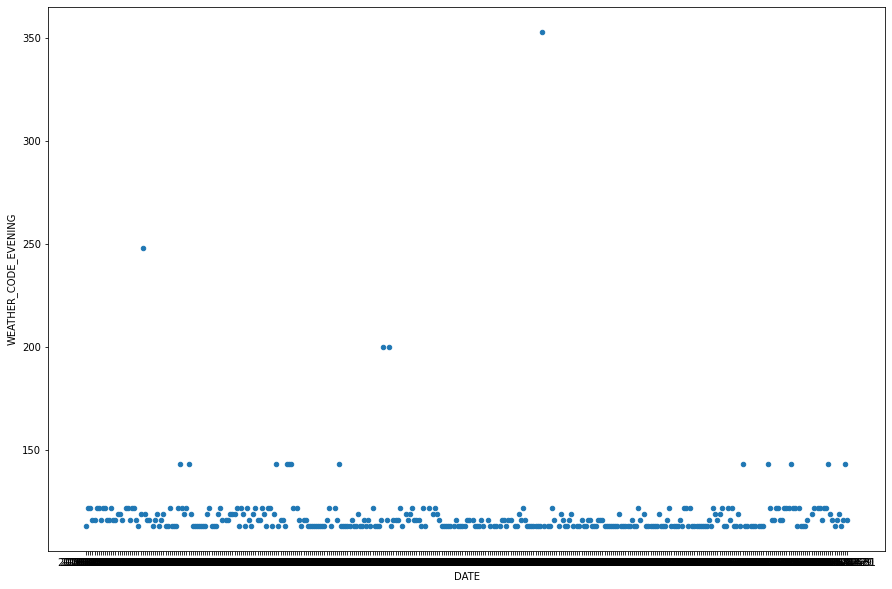

In [ ]:
# Draw a scatterplot with Date on X-axis and WEATHER_CODE_EVENING on Y-axis

df2018.plot.scatter(x='DATE', y='WEATHER_CODE_EVENING', figsize=(15,10) ) 

#### Boxplot directly with Pandas

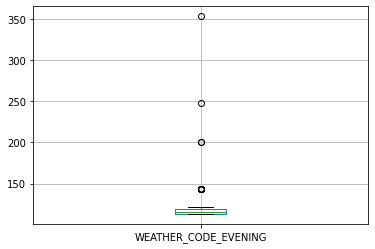

In [ ]:
# Find a way to draw directly with pandas a boxplot on the column WEATHER_CODE_EVENING

df2018[['WEATHER_CODE_EVENING']].boxplot()

#### Deciles

In [ ]:
# Find a way to print the 9 deciles + min + max of the column WEATHER_CODE_EVENING with the quantile method of pandas and a loop



for x in range(0,11, 1):
  print(df2018['WEATHER_CODE_EVENING'].quantile(x/10))


113.0
113.0
113.0
113.0
113.0
116.0
116.0
119.0
122.0
122.0
353.0


In [ ]:
# Alternative Lösung


import numpy as np


print(df2018['WEATHER_CODE_EVENING'].quantile([x for x in np.arange(0, 1.1, 0.1)]))

print(f"min: {df2018['WEATHER_CODE_EVENING'].min()}")
print(f"max: {df2018['WEATHER_CODE_EVENING'].max()}")

0.0    113.0
0.1    113.0
0.2    113.0
0.3    113.0
0.4    113.0
0.5    116.0
0.6    116.0
0.7    119.0
0.8    122.0
0.9    122.0
1.0    353.0
Name: WEATHER_CODE_EVENING, dtype: float64
min: 113.0
max: 353.0


#### Fill values
It seems that most of the data is between 113 and 122. Maybe we could fill the missing values with mean or median, it's up to you to choose. So you need:
- Calculate the mean or the median
- Fill the missing values only for **WEATHER_CODE_EVENING** with the fillna() method 
Remember tu use the *inplace=True* argument

In [ ]:
# Your code here:
print(df2018['WEATHER_CODE_EVENING'].mean())
df2018['WEATHER_CODE_EVENING'].fillna(value=df2018['WEATHER_CODE_EVENING'].mean(),inplace=True)

118.50733137829911


### Next columns : TOTAL_SNOW_MM and UV_INDEX

We trust you to choose the right values to fill for both columns

In [ ]:
# Your code here
df2018['UV_INDEX'].fillna(method = 'bfill', inplace=True)
df2018['TOTAL_SNOW_MM'].fillna( method = 'bfill', inplace=True)

### Next column : 
SUNHOUR

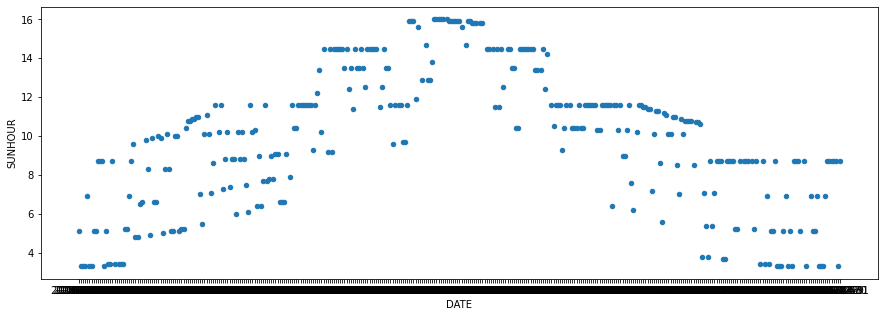

In [ ]:
# Draw a scatterplot with Date on X-axis and SUNHOUR on Y-axis

df2018.plot.scatter(x='DATE', y='SUNHOUR', figsize=(15,5))

#### Propagation
**It seems it's not a good idea to apply the same value all year long...**

You could use the the *method = 'ffill' or 'bfill'* argument in fill_na() to propagate non-null values forward or backward.

In [ ]:
# Your code here
df2018['SUNHOUR'].fillna(method='ffill', inplace=True)

### Column: OPINION
For Opinion column, we don't know the values yet. So, we can add a new value 'unknown' for the missing values in this column.

In [ ]:
df2018['OPINION'].fillna(value='unknown', inplace=True)

## Now, each axis should have 365 non-null values.

In [ ]:
df2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    365 non-null    object 
 1   MAX_TEMPERATURE_C       365 non-null    int64  
 2   MIN_TEMPERATURE_C       365 non-null    int64  
 3   WINDSPEED_MAX_KMH       365 non-null    int64  
 4   TEMPERATURE_MORNING_C   365 non-null    int64  
 5   TEMPERATURE_NOON_C      365 non-null    int64  
 6   TEMPERATURE_EVENING_C   365 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64  
 9   VISIBILITY_AVG_KM       365 non-null    float64
 10  PRESSURE_MAX_MB         365 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64
 12  HEATINDEX_MAX_C         365 non-null    int64  
 13  DEWPOINT_MAX_C          365 non-null    int64  
 14  WINDTEMP_MAX_C          365 non-null    in

## Visualize your modifications
Draw 4 scatterplots with Date on X-axis, and each of the 4 modified columns on Y-axis :
- The original data will be in blue
- The new data in red

It's the moment to use your "flag" column created at the beginning. It'll be easier in Seaborn with "hue".

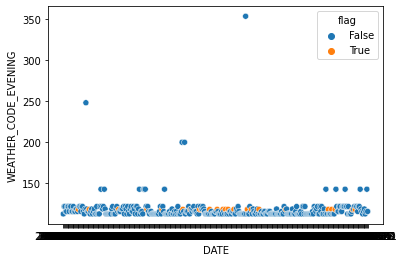

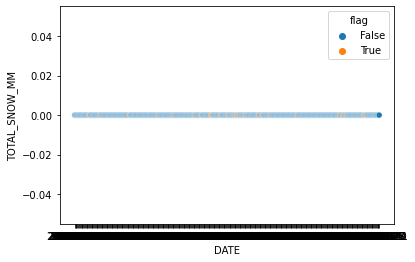

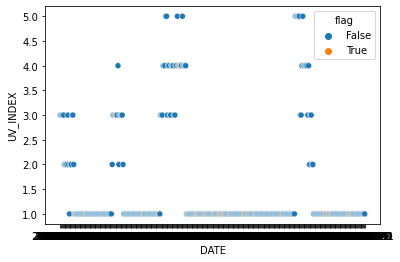

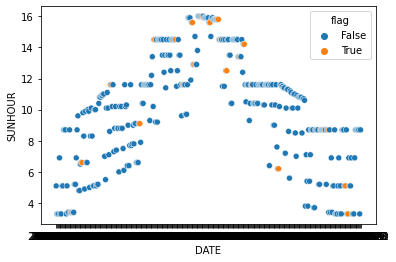

In [ ]:
# Your code here

import seaborn as sns
import matplotlib.pyplot as plt

filled_columns = ["WEATHER_CODE_EVENING","TOTAL_SNOW_MM","UV_INDEX","SUNHOUR"]
for column in filled_columns:
  sns.scatterplot(data=df2018, x="DATE", y=column, hue=df2018['flag'])
  plt.show()

# Apply and Lambda

You know functions, but do you know lambda functions ? Let's try to apply this.

## MONTH
We want to create a new column for months.

"Apply" allows you to apply a function to each of the column values.

In [ ]:
# Try to execute this code:
print(df2018['MAX_TEMPERATURE_C'])
print(df2018['MAX_TEMPERATURE_C'].apply(lambda x: x*10))
# In lambda function, "x" represents the value of each cell. 
# In the max temperature columns, it's integers, so I can multiply it by 10 for example.

0      12
1      13
2      15
3      14
4      12
       ..
360     7
361     7
362     7
363     9
364     9
Name: MAX_TEMPERATURE_C, Length: 365, dtype: int64
0      120
1      130
2      150
3      140
4      120
      ... 
360     70
361     70
362     70
363     90
364     90
Name: MAX_TEMPERATURE_C, Length: 365, dtype: int64


### Create a column Month
In an ideal world, we teach you how to convert a date into a real date-format. But it's too early. So, you know how to play with characters strings:
- Try to get only 2 numbers of the month on a small character string
- Apply this to the Date columns using a lambda function
- Create a new column "MONTH" with that

In [ ]:
x = '2018-05-01'
x[8:10]

'01'

## DAY
Do the same to create a new column "DAY"

In [ ]:
# Your code:
df2018['MONTH'] = df2018['DATE'].apply(lambda x: x[5:7])
df2018['DAY'] = df2018['DATE'].apply(lambda x: x[8:10])
df2018[['DATE','MONTH', 'DAY']].head()

,DATE,MONTH,DAY
0,2018-01-01,01,01
1,2018-01-02,01,02
2,2018-01-03,01,03
3,2018-01-04,01,04
4,2018-01-05,01,05


# Concatenate 2 DataFrames
Concatenate both DataFrames (your new 2018 and the 2019 above) on the 0 axis. Your goal is to have a DataFrame with 25 columns and 730 rows (365*2 years).

Why 25 columns? There are 22 common columns, 1 dedicated column for 2018 (flag) and 2 dedicated columns for 2019.

[Different ways to concatenate and merge](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

In [ ]:
# Your code:
concatenate = pd.concat([df2018, df_weather])
concatenate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 364
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    730 non-null    object 
 1   MAX_TEMPERATURE_C       730 non-null    int64  
 2   MIN_TEMPERATURE_C       730 non-null    int64  
 3   WINDSPEED_MAX_KMH       730 non-null    int64  
 4   TEMPERATURE_MORNING_C   730 non-null    int64  
 5   TEMPERATURE_NOON_C      730 non-null    int64  
 6   TEMPERATURE_EVENING_C   730 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     730 non-null    float64
 8   HUMIDITY_MAX_PERCENT    730 non-null    int64  
 9   VISIBILITY_AVG_KM       730 non-null    float64
 10  PRESSURE_MAX_MB         730 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  730 non-null    float64
 12  HEATINDEX_MAX_C         730 non-null    int64  
 13  DEWPOINT_MAX_C          730 non-null    int64  
 14  WINDTEMP_MAX_C          730 non-null    in

## Add a Year Column

In [ ]:
# Your code:
concatenate["YEAR"] = concatenate['DATE'].apply(lambda x: x[0:4])
concatenate[['DATE','YEAR']].head()

,DATE,YEAR
0,2018-01-01,2018
1,2018-01-02,2018
2,2018-01-03,2018
3,2018-01-04,2018
4,2018-01-05,2018


# Draw 4 charts to compare 2018 and 2019 :
- Histogram for the Windspeed
- Boxplots for the Precipitation
- Scaterplots for Sunhour and Date
- Violin plots for Max Temperature

On each chart, we see if 2018 and 2019 are different or similar, so use color !

Text(0.5, 1.0, 'Histogram of Windspeed')

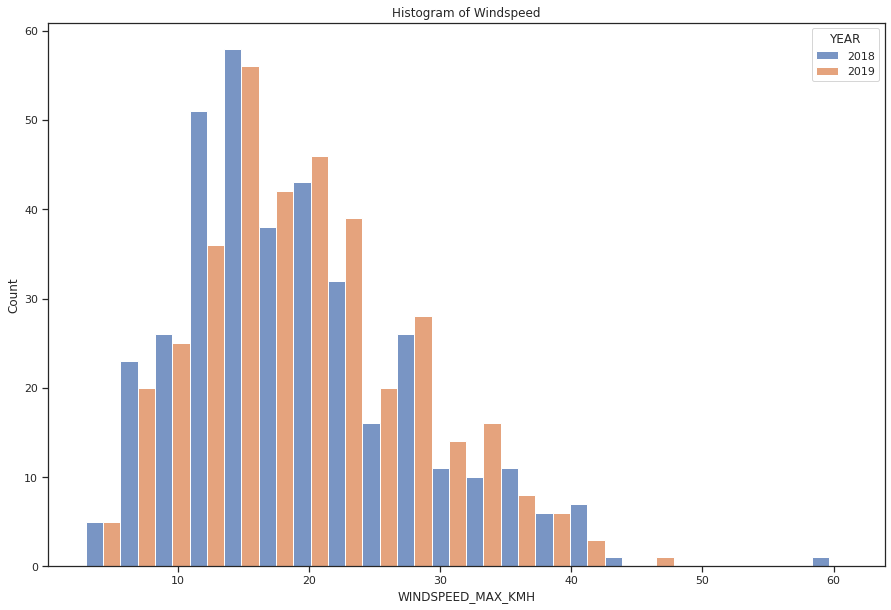

In [ ]:
# Your code:
sns.set(rc={'figure.figsize':(15,10)})
sns.set_style("ticks")
sns.histplot(concatenate, x="WINDSPEED_MAX_KMH", hue="YEAR", multiple="dodge").set_title("Histogram of Windspeed")


Text(0.5, 1.0, 'Boxplots for the Precipitation')

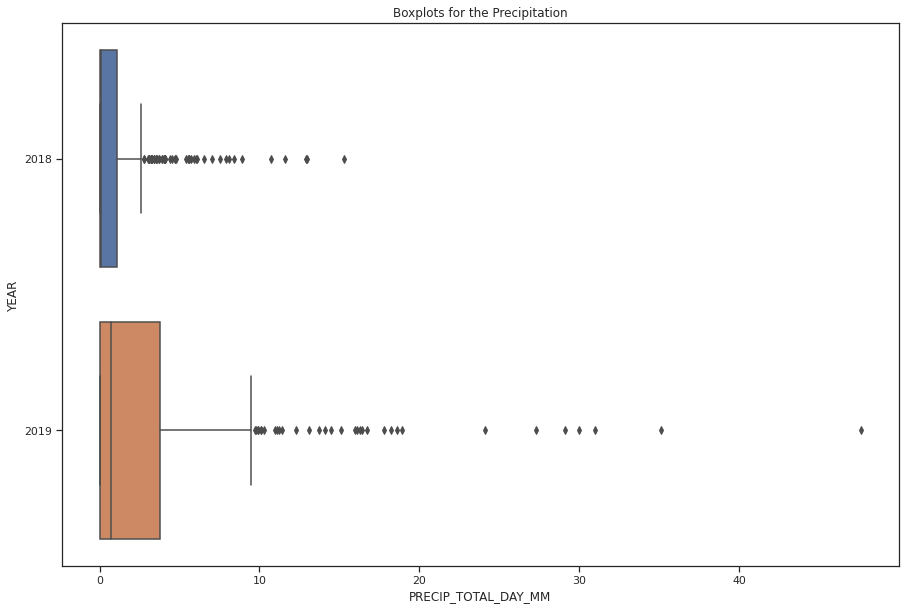

In [ ]:
sns.boxplot(x="PRECIP_TOTAL_DAY_MM",y="YEAR",data=concatenate).set_title("Boxplots for the Precipitation")

Text(0.5, 1.0, 'Scaterplots for Sunhour and Date')

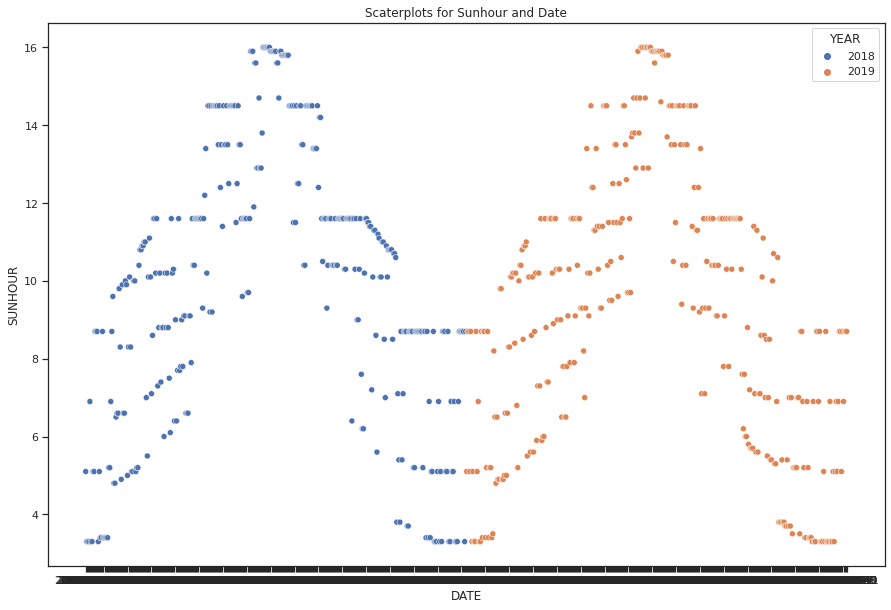

In [ ]:
concatenate["DATE"]=concatenate["DATE"]
sns.scatterplot(x="DATE",y="SUNHOUR", hue="YEAR",data=concatenate).set_title("Scaterplots for Sunhour and Date")

Text(0.5, 1.0, 'Violin plots for Max Temperature')

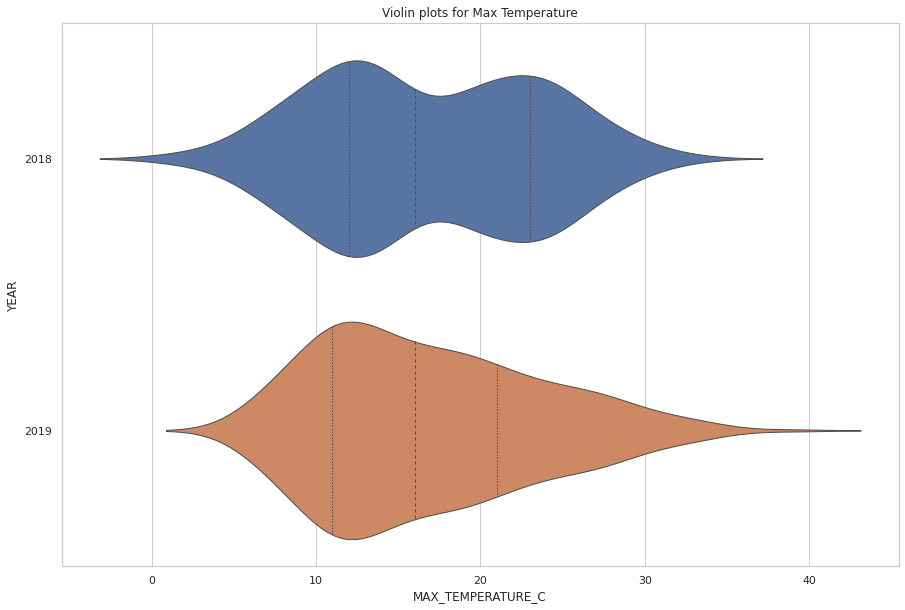

In [ ]:
sns.set_theme(style="whitegrid")
sns.violinplot(x="MAX_TEMPERATURE_C",y="YEAR",data=concatenate, inner="quart", linewidth=1).set_title("Violin plots for Max Temperature")